# Supervised learning
In general we have two types of supervised learning:

1. Regression (given training data + desired labeled *continuous outputs*)
2. Classification (given training data + desired labeled *categorical outputs*)

## Supervised Learning

We will use simple two dimensional data set from [here](https://archive.org/download/ages-and-heights/AgesAndHeights.pkl). Download the dataset into this notebook using [wget](https://www.gnu.org/software/wget/) and visualise them.

The dataset is in [pickle](https://docs.python.org/3/library/pickle.html) format.

In [1]:
# important data structure library!
import pandas as pd

# read pickle format
rawdataset = pd.read_pickle("../data/AgesAndHeights.pkl")

In [2]:
rawdataset

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


### Visualise data using histogram
Use Pandas [``hist()``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) to visualise approximate representation of the distribution of numerical data. The Y-axis in both the plots refers to frequency and X-axis represents *Age* and *Height* respectively.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>]], dtype=object)

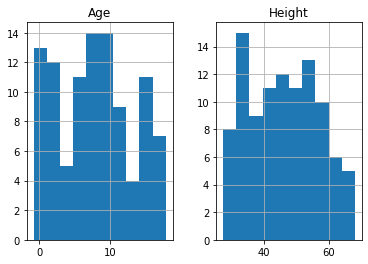

In [3]:
rawdataset.hist()

### Data Cleaning

We are going to build model using valid dataset and clean the unaccountable data (empty/null). In the above histograms, we can see that there are a few entries that have an age less than zero which is meaningless. Hence, we need to clean those data to get better accuracy.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

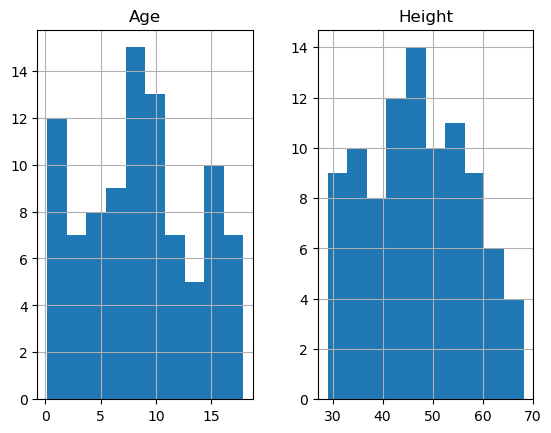

In [3]:
cleandataset = rawdataset[rawdataset["Age"]>0]
cleandataset.hist()

### Visualise data using scatter plot
We will represent *Age* on X-axis and *Height* on Y-axis. The points in the plot refer to data from `cleandataset`. We use Pandas  [`plot.scatter()`](https://https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html) to plot.

In [5]:
cleandataset.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


In [6]:
cleandataset.shape

(93, 2)

Text(0.5, 0, 'Age (year)')

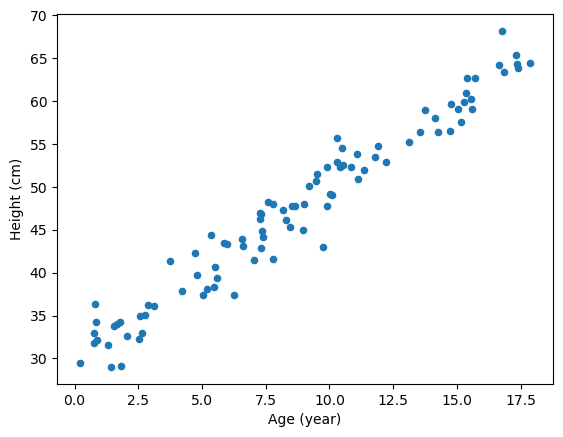

In [4]:
# Draw a scatter plot
ax = cleandataset.plot.scatter(x = 'Age', y = 'Height');

# Set x and y axis labels
ax.set_ylabel("Height (cm)")
ax.set_xlabel("Age (year)")

### Build the model and train it

Here we are going to use simple [linear regression](https://en.wikipedia.org/wiki/Linear_regression) to train our *Age-Height* model.

Steps:

1. Learn parameters
2. Train model using the learned (optimal) parameters
3. Evaluate prediction

### Learning paramaters
We create a function called `learnpars()` that uses the basic straight-line equation and returns `y`, in our case *Height*. If we pass the required parameters and run `learnpars()`, we will find that the height we get for the age as input does not match. Hence, we use `learnpars()` to train the model.

Straight line equation: `Y = a + bX` (a = alpha, b=beta)

In [9]:
# using random parameter values
pars = {"alpha" : 40, "beta" : 4}

# using learned paramaters
# pars = {"alpha": 29.961857614615834, "beta": 2.0014168989106302}

def y_height(age, pars):
  alpha = pars["alpha"]
  beta = pars["beta"]
  return alpha + beta * age

y_height(5, pars)

60

In [6]:
def learnpars(data, pars):
  x,y = cleandataset["Age"], cleandataset["Height"]
  x_bar, y_bar = x.mean(), y.mean()
  x,y = x.to_numpy(), y.to_numpy()
  beta = sum((x-x_bar) * (y-y_bar) / sum((x-x_bar)**2))
  alpha = y_bar - beta * x_bar
  pars["alpha"] = alpha
  pars["beta"] = beta

In [7]:
# Find the correct parameters
newpars = {"alpha" : 0, "beta" : 0}
learnpars(cleandataset,newpars)

# The optimal alpha and beta parameters
newpars

{'alpha': 29.96185761461583, 'beta': 2.0014168989106316}

### Dummy dataset
This demonstrates how parameters selection can impact the model.

In [10]:
# Create a dummy list of age
dummy_ages = list(range(19))

# Predict height using unoptimised parameters
untrained_predicted_heights = [y_height(age, pars) for age in dummy_ages]

# Create a dataframe
untrained = pd.DataFrame(list(zip(dummy_ages, untrained_predicted_heights)), columns =['Age', 'Height'])

untrained

,Age,Height
0,0,40
1,1,44
2,2,48
3,3,52
4,4,56
5,5,60
6,6,64
7,7,68
8,8,72
9,9,76


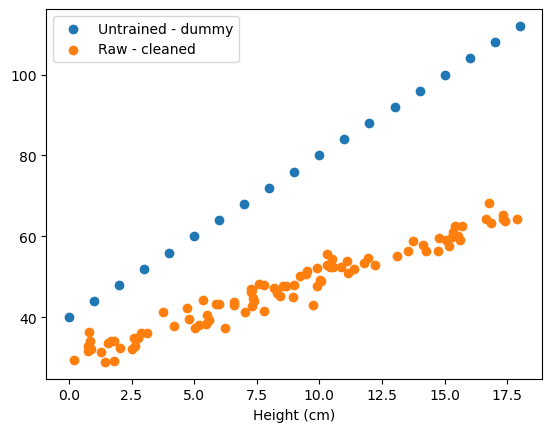

In [11]:
import matplotlib.pyplot as plt

# Draw a scatter plot
plt.scatter(untrained["Age"], untrained["Height"], label="Untrained - dummy");
plt.scatter(cleandataset["Age"], cleandataset["Height"], label="Raw - cleaned");

# Set x and y axis labels
plt.xlabel("Age (year)")
plt.xlabel("Height (cm)")
plt.legend()

### Regression using trained parameters

We do a regression over `cleandataset` using the trained parameters (`newpars`) by calling `y_height()` and we plot the prediction results.

In [12]:
# run regression
trained_predicted_heights = [y_height(age, newpars) for age in cleandataset["Age"]]

# Create a dataframe
trained = pd.DataFrame(list(zip(cleandataset["Age"], trained_predicted_heights)), columns =['Age', 'Height'])

,Age,Height
0,14.767874,59.518530
1,3.107671,36.181604
2,7.266917,44.505988
3,1.815180,33.594789
4,16.753758,63.493111
...,...,...
88,7.323712,44.619658
89,5.591509,41.152799
90,2.625606,35.216789
91,5.519293,41.008264


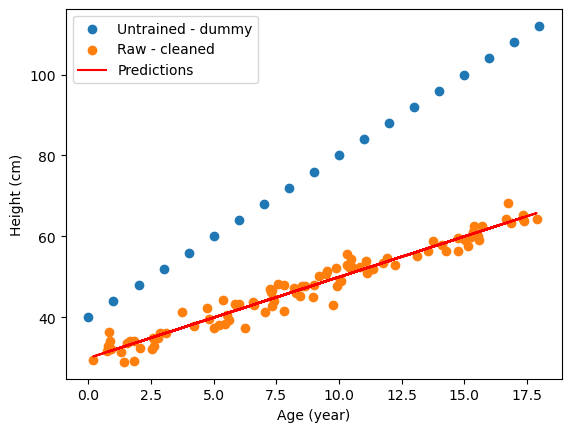

In [13]:
# Draw a scatter plot
plt.scatter(untrained["Age"], untrained["Height"], label="Untrained - dummy");
plt.scatter(cleandataset["Age"], cleandataset["Height"], label="Raw - cleaned");
# Regression results
plt.plot(trained["Age"], trained["Height"], label="Predictions", color="red");

# Set x and y axis labels
plt.xlabel("Age (year)")
plt.ylabel("Height (cm)")
plt.legend()

trained

### Evaluate prediction performance

We need to measure how well is our model predicting the height. Therefore we use [Root Mean Squared Error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) to measure how far is our predicted values from the actual values, on average.

In [8]:
from sklearn.metrics import mean_squared_error 

# root mean squared error: how far predicted from the actual value, on average
rmse = mean_squared_error(cleandataset["Height"], trained["Height"], squared = False)

print("RMSE: " + str(rmse) + "cm")

RMSE: 2.150968738235214cm


### Predicting unseen data

We can test our model to predict model using a completely new, unseen data.

In [17]:
# age_input = int(input("Enter an 'age' to predict height: "))
# y_height(age_input, newpars)

In [18]:
age_input = 16
y_height(age_input, newpars)

61.984527997185936

## Multiple Linear Regression
In the previous simple linear example, we only deal with one independent variable (age) and one dependent variable (height).

In cases when we have more than one independent variables (features) and one dependent variable, we call it a multiple linear regression problem. 

To do multiple linear regression, we first convert the standard linear equation:

`y = a + Bx`

to

`y = a + B1x1 + B2x2 + ... + Bnxn`

where `a` is the intercept and `B1, B2, ... ,Bn` are the coefficients (slope) concerning independent variable `x1, x2, ..., xn`. This essentially indicates that if we increase the value of `x1` by 1 unit then `B1` says that how much value it will affect `y`, and this was similar concerning for `B2, ... ,Bn`.

The next example demonstrates this case. We will use 2016 Air Quality dataset which consists of 9538 instances. 

### AirQuality file dataset column information

0. Date the reading was recorded on
1. Time of the day the reading was recorded on
2. Concentration of CO in milligram/m^3
3. Sensor response for Tin oxide
4. Concentration of Non Metanic HydroCarbons concentration in microg/m^3
5. Concentration of Benzene in microg/m^3
6. Sensor response for titania
7. Concentration of NOx concentration in parts per billion
8. Sensor response for Tungsten Oxide (Targeting NOx)
9. Concentration of NO2 in microg/m^3
10. Sensor response for Tungsten Oxide (Targeting NO2)
11. Sensor response for Indium Oxide
12. Temperature at the time of the reading (°C)
13. Relative Humidity (%)
14. Absolute Humidity

Full description of this dataset can be found [here](https://gist.github.com/shreyasiitr/57f8fa30fa20b049359fb567cc6407d0)


In [2]:
# important data structure library!
import pandas as pd

# Read raw dataset file into Pandas dataframe
df = pd.read_csv("../data/AirQualityUCI.csv")

In [3]:
df.head()

,Date,Time,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [4]:
df.tail()

,Date,Time,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139
9356,4/4/2005,14:00:00,2.2,1071,-200,11.9,1047,265,654,168,1129,816,28.5,13.1,0.5028


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9357 non-null   object 
 1   Time    9357 non-null   object 
 2   CO      9357 non-null   float64
 3   PT08S1  9357 non-null   int64  
 4   NMHC    9357 non-null   int64  
 5   C6H6    9357 non-null   float64
 6   PT08S2  9357 non-null   int64  
 7   NOx     9357 non-null   int64  
 8   PT08S3  9357 non-null   int64  
 9   NO2     9357 non-null   int64  
 10  PT08S4  9357 non-null   int64  
 11  PT08S5  9357 non-null   int64  
 12  T       9357 non-null   float64
 13  RH      9357 non-null   float64
 14  AH      9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [24]:
# 12 independent variables
# X = df.drop(["Date", "Time", "C6H6"], axis=1) 
X = df.drop(["Date", "Time", "RH"], axis=1) 

# dependent variable
# y = df["C6H6"]
y = df["RH"]

Text(0, 0.5, 'C6H6(GT)')

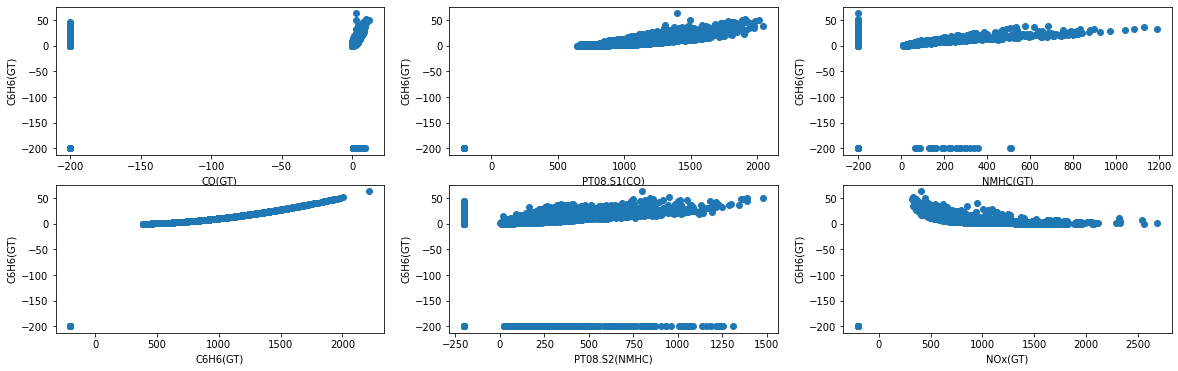

In [18]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(20,6))

plt.subplot(2,3,1)
plt.scatter(X.iloc[:,0], y)
# Set x and y axis labels
plt.xlabel("CO(GT)")
plt.ylabel("C6H6(GT)")
# plt.legend()

plt.subplot(2,3,2)
plt.scatter(X.iloc[:,1], y)
# Set x and y axis labels
plt.xlabel("PT08.S1(CO)")
plt.ylabel("C6H6(GT)")
# plt.legend()

plt.subplot(2,3,3)
plt.scatter(X.iloc[:,2], y)
# Set x and y axis labels
plt.xlabel("NMHC(GT)")
plt.ylabel("C6H6(GT)")
# plt.legend()

plt.subplot(2,3,4)
plt.scatter(X.iloc[:,3], y)
# Set x and y axis labels
plt.xlabel("C6H6(GT)")
plt.ylabel("C6H6(GT)")
# plt.legend()

plt.subplot(2,3,5)
plt.scatter(X.iloc[:,4], y)
# Set x and y axis labels
plt.xlabel("PT08.S2(NMHC)")
plt.ylabel("C6H6(GT)")
# plt.legend()

plt.subplot(2,3,6)
plt.scatter(X.iloc[:,5], y)
# Set x and y axis labels
plt.xlabel("NOx(GT)")
plt.ylabel("C6H6(GT)")
# plt.legend()



In [25]:
X.head()

,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,0.7888


In [26]:
y.head()

0    48.9
1    47.7
2    54.0
3    60.0
4    59.6
Name: RH, dtype: float64

### Training and testing dataset split

In [27]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [12]:
len(X_train)

6549

In [13]:
len(X_test)

2808

### Training

In [28]:
# importing module
from sklearn.linear_model import LinearRegression

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
mlr = LR.fit(X_train,y_train)

### Testing

In [29]:
y_pred =  mlr.predict(X_test)

### Model evaluation

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

# r2 score
score = r2_score(y_test, y_pred)

# root mean squared error: how far predicted from the actual value, on average
rmse = mean_squared_error(y_test, y_pred, squared = False)

print("r2 score: ", score)
print("RMSE: ", rmse, "mg/m^3")

r2 score:  0.9751845136926791
RMSE:  8.01070367598407 mg/m^3
